<a href="https://colab.research.google.com/github/Piaiai/My-pets/blob/master/ORO_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import imutils
import os
import numpy as np
from PIL import Image
!unzip -uq "/content/ОРО_Лб_1_jpg"

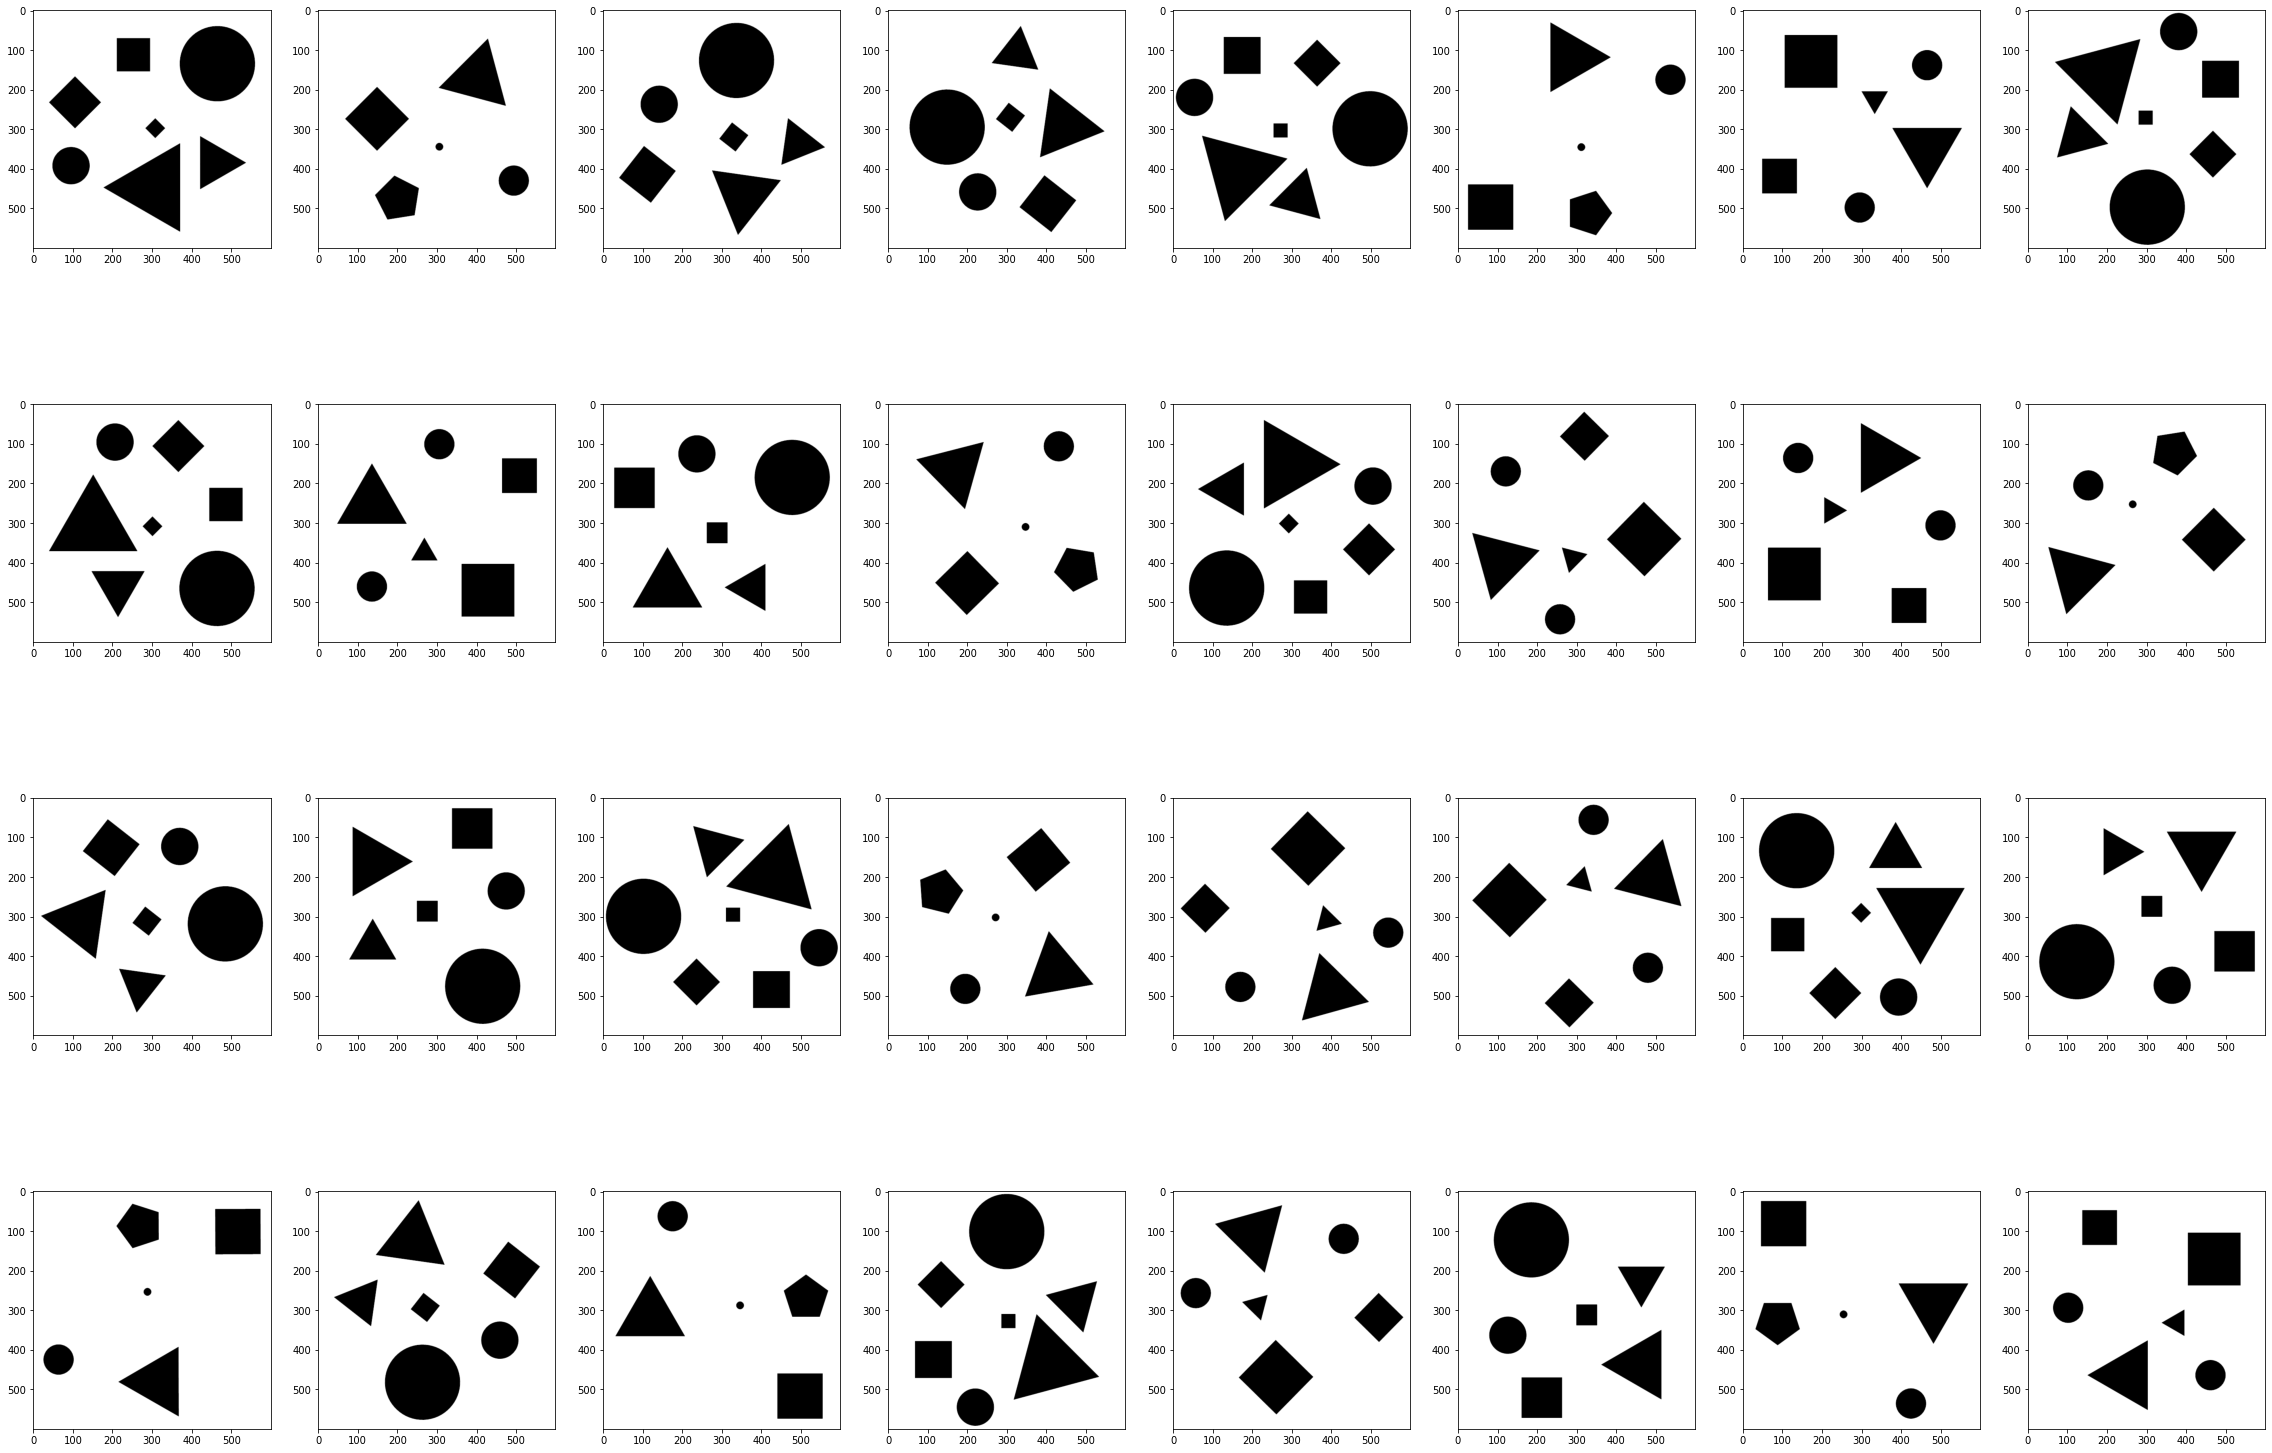

In [ ]:
img_path = "/content/ОРО_Лб_1_jpg/"
columns = 8
images = os.listdir(img_path)
plt.figure(figsize=(40,35))

for i, image in enumerate(images):
    img = cv2.imread(img_path + image, 0)
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(img, cmap='gray')

In [ ]:
def captureShape(img_path):
    image = cv2.imread(img_path)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    distance_pixels = 5
    ROI_number = 0
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    figure_bounds = []
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        figure_bounds.append((x, y, w, h))
        cv2.rectangle(image, (x - distance_pixels, y - distance_pixels), (x + w + distance_pixels, y + h + distance_pixels), (0,0,255), 2)
        radius = w // 10
        cv2.circle(image, (x + w//2, y + h//2), radius, (36,255,12), -1) 
        ROI = original[y:y+h, x:x+w]
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1

    plt.imshow(image)
    return figure_bounds


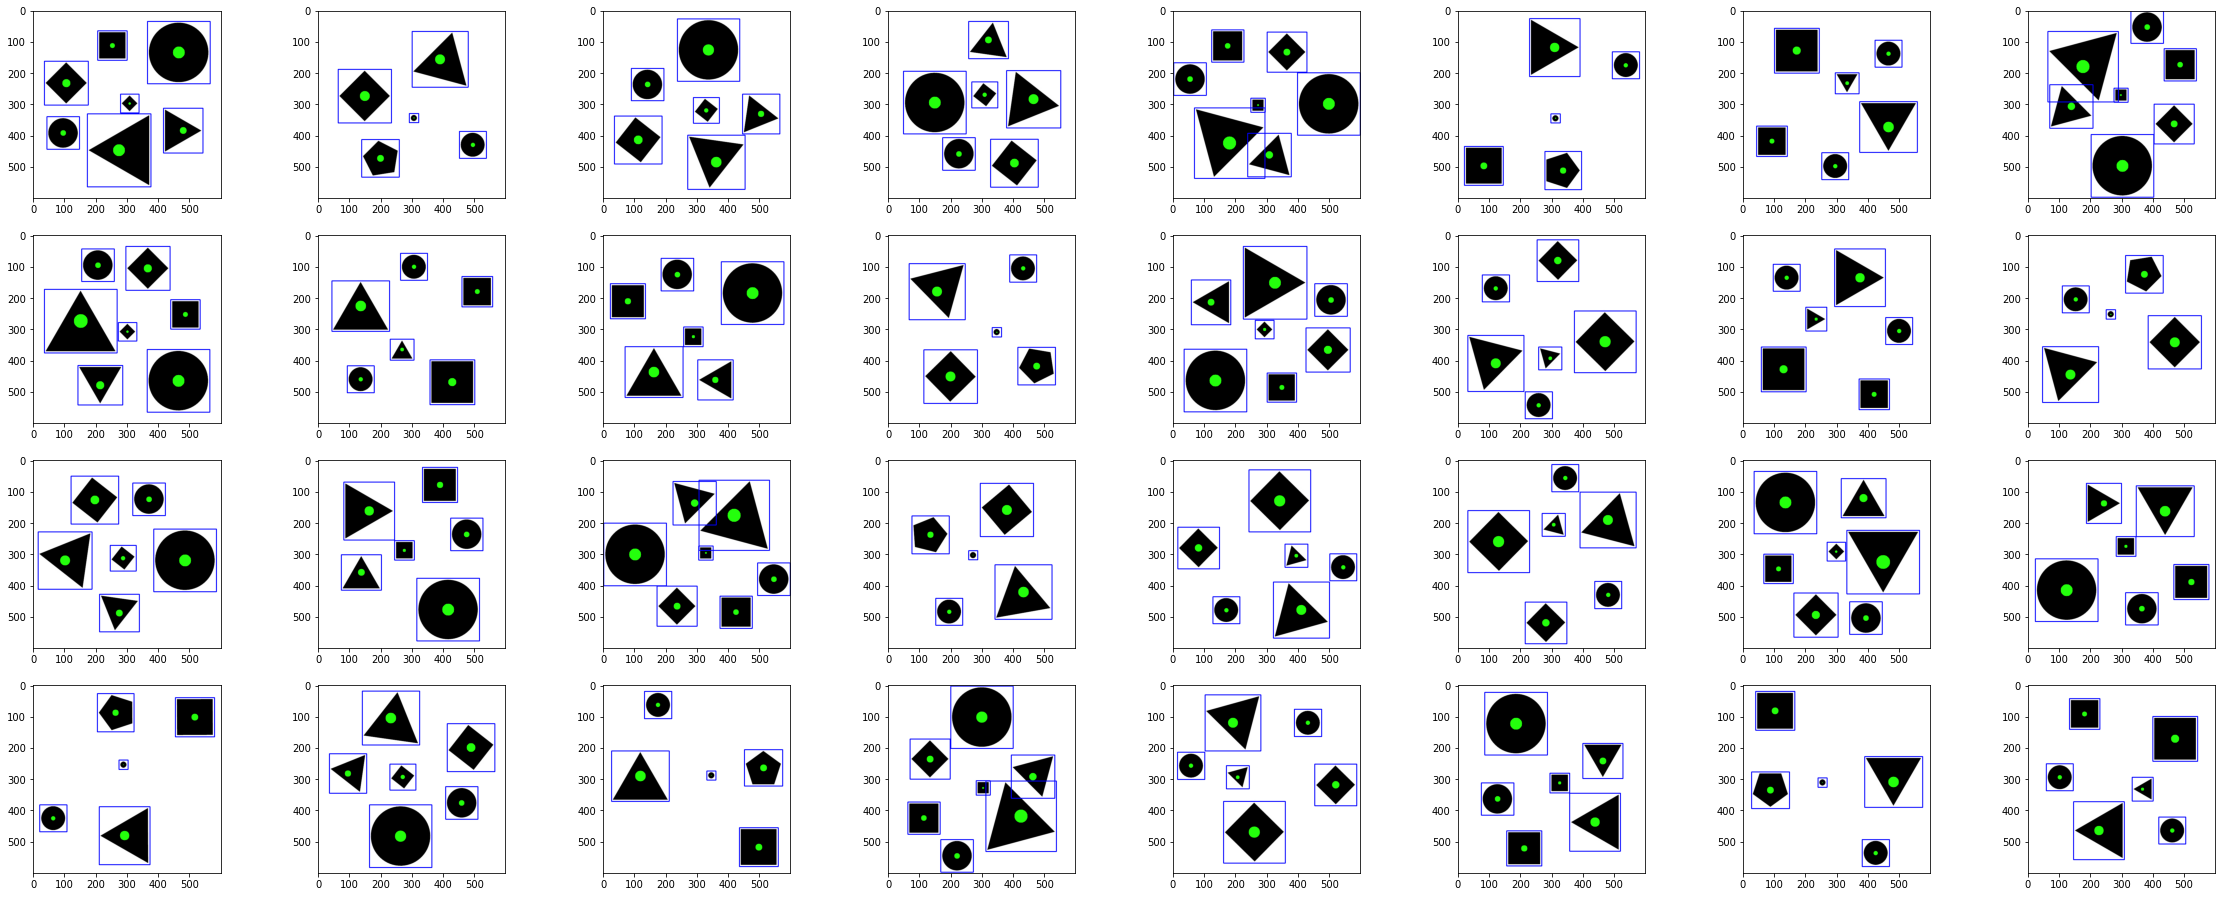

In [ ]:
plt.figure(figsize=(40,20))
capturedShapesCoordinates = []
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    shapes = captureShape(img_path + image)
    capturedShapesCoordinates.append(shapes)

Square of object 1 is 54. Central Coordinates are: 358 and 462
Wrong input... Try entering numbers between 0 and 31
Square of object 2 is 18635. Central Coordinates are: 162 and 437
Wrong input... Try entering numbers between 0 and 31
Square of object 3 is 278. Central Coordinates are: 288 and 324
Wrong input... Try entering numbers between 0 and 31
Square of object 4 is 3294. Central Coordinates are: 79 and 211
Wrong input... Try entering numbers between 0 and 31
Square of object 5 is 13262. Central Coordinates are: 477 and 185
Wrong input... Try entering numbers between 0 and 31
Square of object 6 is 3799. Central Coordinates are: 237 and 126
Wrong input... Try entering numbers between 0 and 31


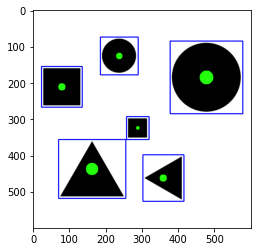

<Figure size 2160x1440 with 0 Axes>

In [ ]:
def squares(imgInfo, img): # bmp image
    square_ = []
    for i in imgInfo:
        x, y, w, h = i
        crop_img = img[x:x + w, y:y + h]
        square = 0
        for i in range(crop_img.shape[0]):
            for j in range(crop_img.shape[1]):
                if not np.array_equal(crop_img[i, j], [255, 255, 255]):
                    square+=1
        square_.append(square)
    return square_
    
def centers(imgInfo):
    centers = []
    for i in imgInfo:
        x, y, w, h = i
        centers.append((x + w//2, y + h//2))
    return centers

#print("Enter the number of image: ")
#try:    
figure_num = 10
image_name = images[figure_num]
captureShape(img_path + image_name)
img = cv2.imread(img_path + image_name)
shapes_coord = capturedShapesCoordinates[figure_num]
squares_img = squares(shapes_coord, img)
centers_img = centers(shapes_coord)
plt.figure(figsize=(30, 20))
for i in range(len(squares_img)):
    print("Square of object {0} is {1}. Central Coordinates are: {2} and {3}".format(i + 1, squares_img[i], centers_img[i][0], centers_img[i][1]))
    
#except ValueError and IndexError:
    print('Wrong input... Try entering numbers between 0 and 31')